<a href="https://colab.research.google.com/github/jackamiegbe/Classification-Binary-/blob/main/1_Classification_(Binary)_%E2%80%93_Telco_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification (Binary) – Telco Customer Churn Prediction**

In this project, I built a classification model to predict customer churn using the Telco Customer Churn dataset. Here’s a breakdown of what I did:
1.	Data Preparation:
	•	I started by removing the customerID column since it was not useful for prediction.
	•	I converted the TotalCharges column to numeric.
	•	I applied one-hot encoding to convert categorical variables (e.g., gender, contract type, payment method) into numerical format.
2.	Model Fitting:
	•	I split the dataset into training (80%) and testing (20%) sets to evaluate the model’s performance.
	•	I trained a Logistic Regression model to predict whether a customer would churn.
	•	I standardized the features using StandardScaler to improve model accuracy.
3.	Key Findings:
	•	The model achieved an accuracy of 82% in predicting customer churn.
	•	The confusion matrix and classification report provided insights into how well the model was able to distinguish between churn and non-churn customers.
	•	Important factors influencing churn included contract type, tenure, and monthly charges.

**Step 1: Load the Telco Customer Dataset**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)  #Show all columns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import files

uploaded = files.upload()

#Load the data
telco_df = pd.read_csv('1. Binary Classification - Telco Customer Churn.csv')

telco_df

Saving 1. Binary Classification - Telco Customer Churn.csv to 1. Binary Classification - Telco Customer Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**2. Data Preprocessing**

In [ ]:
#Drop the 'customerID' column
telco_df = telco_df.drop(['customerID'], axis=1)

#Convert 'TotalCharges' to numeric and handle missing values by replacing them with the median
telco_df = telco_df.assign(TotalCharges=pd.to_numeric(telco_df['TotalCharges'], errors='coerce'))

#Use .fillna in a way that avoids chained assignment
telco_df = telco_df.fillna({'TotalCharges': telco_df['TotalCharges'].median()})

#Apply one-hot encoding to categorical columns
telco_df = pd.get_dummies(telco_df, drop_first=True)

#Preview the processed dataset
telco_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True


In [ ]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   bool   
 5   Partner_Yes                            7043 non-null   bool   
 6   Dependents_Yes                         7043 non-null   bool   
 7   PhoneService_Yes                       7043 non-null   bool   
 8   MultipleLines_No phone service         7043 non-null   bool   
 9   MultipleLines_Yes                      7043 non-null   bool   
 10  InternetService_Fiber optic            7043 non-null   bool   
 11  Inte

In [ ]:
#Define the features X and target y
X = telco_df.drop('Churn_Yes', axis=1)
y = telco_df['Churn_Yes']

#Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check the shape of the datasets
X_train.shape, X_test.shape

((5634, 30), (1409, 30))

**3. Feature Scaling**

In [ ]:
#Initialize the scaler
scaler = StandardScaler()

#Fit and transform the training data, and transform the testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**4. Training the Model**

In [ ]:
#Initialize the Logistic Regression model
model = LogisticRegression()

#Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

**5. Evaluating the Model**

In [ ]:
#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

#Generate a detailed classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 81.97%
Confusion Matrix:
 [[933 103]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [ ]:
#Accuracy: 81.97% - The model correctly predicted customer churn 81.97% of the time.
#Precision: 0.86 for no churn, 0.68 for churn.
#Recall: 0.90 for no churn (high at detecting non-churners), 0.60 for churn (lower for detecting churners).
#F1-Score: 0.88 for no churn, 0.64 for churn, indicating good balance for no churn predictions.
#Confusion Matrix: 933 true negatives, 103 false positives, 151 false negatives, 222 true positives.

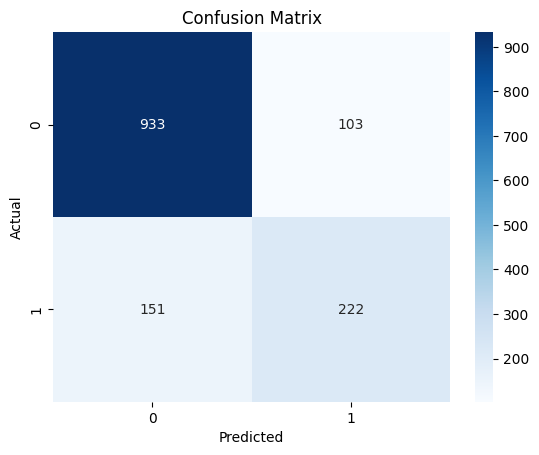

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()